# **Machine Learning Project - Regression**


# **About Dataset**
*The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.*

**122 instances for each region.**


1.   The period from June 2012 to September 2012.
2.   The dataset includes 11 attributes and 1 output attribute (class)
3. The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.
4. Also This has an continuos output feature 'FWI'







## **Data Exploration and Cleaning**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('/content/Algerian_forest_fires_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [4]:
df.isnull().sum()

,0
day,1
month,2
year,2
Temperature,2
RH,2
Ws,2
Rain,2
FFMC,2
DMC,2
DC,2


In [5]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
df.loc[:123,"Region"] = 0
df.loc[123:,"Region"] = 1


In [7]:
df[['Region']]=df[['Region']].astype(int)

In [8]:
df.iloc[124,:]


,124
day,day
month,month
year,year
Temperature,Temperature
RH,RH
Ws,Ws
Rain,Rain
FFMC,FFMC
DMC,DMC
DC,DC


In [9]:
df=df.drop(124).reset_index(drop=True)

In [10]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
167,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [11]:
df=df.drop(123).reset_index(drop=True)
df=df.drop(122).reset_index(drop=True)

In [12]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [13]:
df.iloc[165,-3] = 0

In [14]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,0,NaN,1


In [15]:
mean_fwi = df['FWI'].astype(float).mean()

In [16]:
df.iloc[165,-3] = mean_fwi

In [17]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,7.006557,NaN,1


In [18]:
classes = df.iloc[:,-2]
mode_classes = classes.mode().values

mode_classes[0]




'fire   '

In [19]:
df.iloc[165,-2] = mode_classes[0]

In [20]:
df.iloc[165,:]

,165
day,14
month,7
year,2012
Temperature,37
RH,37
Ws,18
Rain,0.2
FFMC,88.9
DMC,12.9
DC,14.6 9


In [21]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [22]:
#trying by myself

In [23]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [25]:
df.columns=df.columns.str.strip()

In [26]:
df[['day',	'month',	'year',	'Temperature',	'RH',	'Ws'	]]=df[['day',	'month',	'year',	'Temperature',	'RH',	'Ws'	]].astype(int)

In [27]:
objects = [i for i in df.columns if df[i].dtypes=='O']

In [28]:
for obj in objects:
  if obj!='Classes':
      df[obj]=df[obj].astype(str)
      df[obj]=df[obj].str.replace(' ' , '')
      df[obj]=df[obj].astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.7+ KB


In [30]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.035273,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.425242,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.450000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [31]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [32]:
df['Classes'].value_counts() #106 - not fire, 138 - fire

,count
Classes,
fire,132
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [33]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'Not Fire','Fire')

In [34]:
df['Classes'].value_counts()

,count
Classes,
Fire,138
Not Fire,106


In [35]:
df.to_csv = ('Clean_Algerian_ForestFire_Dataset.csv')

In [36]:
data = df

In [37]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Not Fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Not Fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Not Fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,Not Fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,Not Fire,0


In [38]:
data['Classes']=np.where(data['Classes'].str.contains('Not Fire'),'0','1')

In [39]:
data['Classes'].value_counts()

,count
Classes,
1,138
0,106


In [40]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [41]:
data = data.drop(['day', 'month', 'year'], axis=1)

In [42]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


## **Exploratory Data Analysis (EDA)**

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Region'}>, <Axes: >]], dtype=object)

<Figure size 1000x600 with 0 Axes>

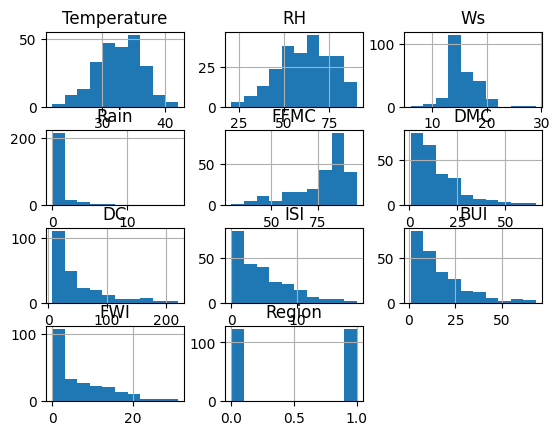

In [43]:
plt.figure(figsize=(10,6))

data.hist()

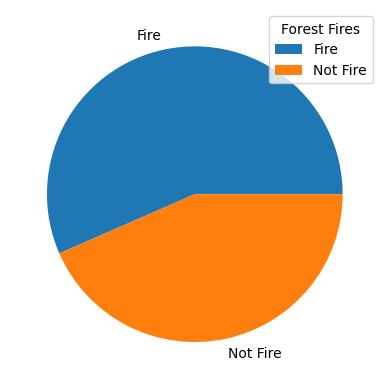

In [44]:
plt.pie(df['Classes'].value_counts(normalize=True)*100,labels = ['Fire','Not Fire'])

plt.legend(title='Forest Fires',loc='upper right')

In [45]:
data.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.564578,0.518119,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.577550,-0.435023,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.032301,-0.066529,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.324364,-0.379449,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.690277,0.770114,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875829,0.584188,0.191094
DC,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.738725,0.507132,-0.081482
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.916314,0.735511,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.857635,0.583882,0.087370
FWI,0.564578,-0.577550,0.032301,-0.324364,0.690277,0.875829,0.738725,0.916314,0.857635,1.000000,0.718065,0.196680


<Axes: >

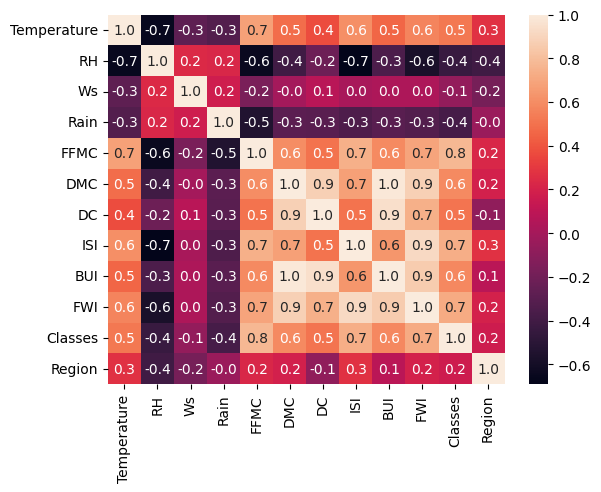

In [46]:
sns.heatmap(data.corr(),annot=True, fmt=".1f")

In [47]:
data_region_1 = df.loc[data['Region']==1]
data_region_0 = df.loc[data['Region']==0]

Text(0.5, 1.0, 'Fires based on Month in Region 1')

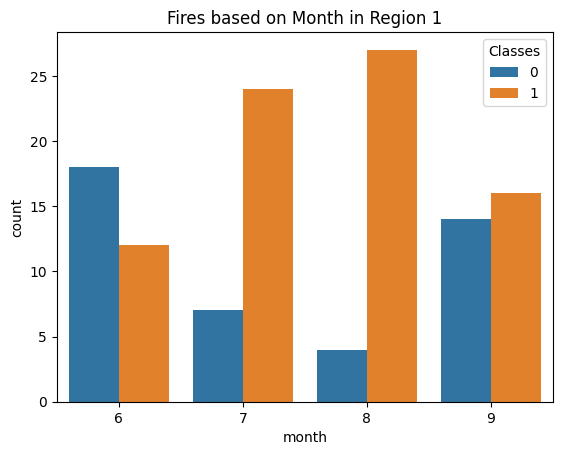

In [48]:
sns.countplot(data_region_1, x='month', hue='Classes')
plt.title('Fires based on Month in Region 1')

Text(0.5, 1.0, 'Fires based on Month in Region 0')

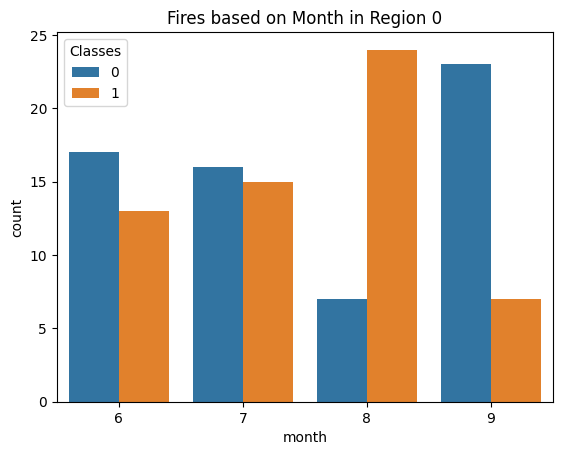

In [49]:
sns.countplot(data_region_0, x='month', hue='Classes')
plt.title('Fires based on Month in Region 0')

## **Feature Engineering / Selection**

In [50]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [51]:
X = data.drop('FWI',axis = 1)
y = data['FWI']

In [52]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 42)

X_train.shape,X_test.shape

((183, 11), (61, 11))

Eliminating Colinearity

<Axes: >

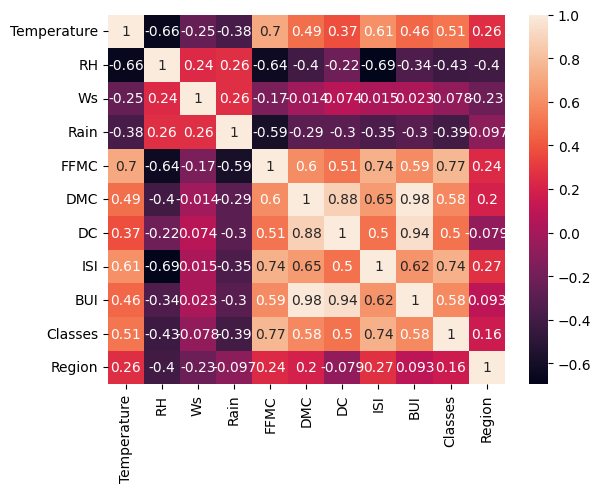

In [53]:
corr = X_train.corr()

sns.heatmap(X_train.corr(),annot=True,)

In [54]:
X_train=X_train.drop(['BUI','DC'], axis = 1)
X_test=X_test.drop(['BUI','DC'], axis = 1)

In [55]:
X_train.shape,X_test.shape

((183, 9), (61, 9))

Scaling The Features

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [57]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

<ipython-input-58-2544ab6f0983>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

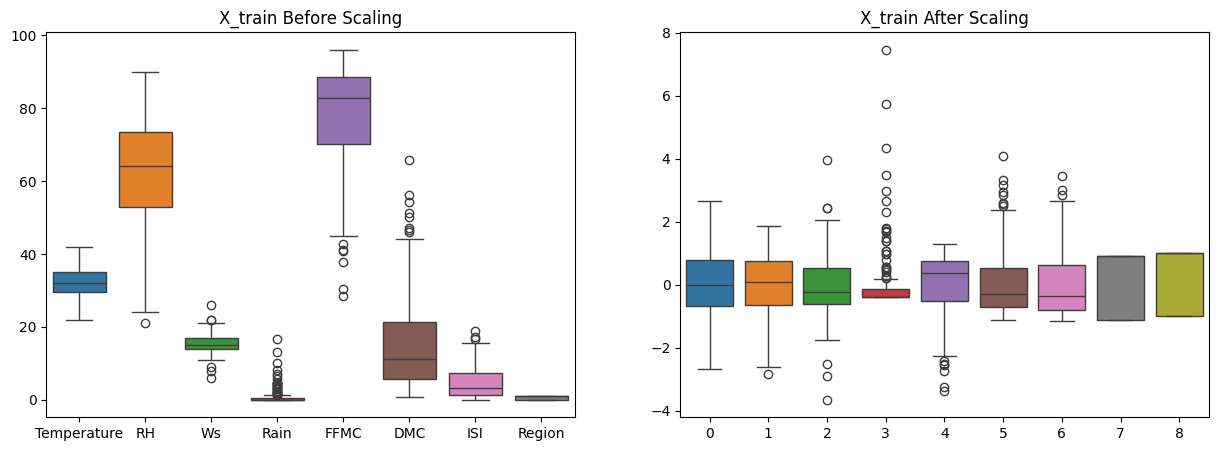

In [58]:
plt.subplots (figsize=(15,5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [59]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
115,29,65,19,0.6,68.3,5.5,1.5,0,0
181,36,56,16,0.0,88.9,23.8,8.2,1,1
225,31,72,14,0.0,84.2,8.3,3.8,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
104,25,86,21,4.6,40.9,1.3,0.1,0,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,33,57,16,0.0,87.5,15.7,6.7,1,1


Bulding Model

r2 Score :  0.9888455499472563
MAE :  0.6078083384244465


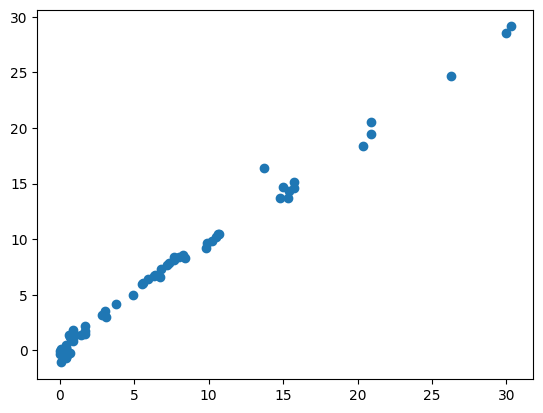

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
linear_model = LinearRegression()

linear_model.fit(X_train_scaled, y_train)
y_pred = linear_model.predict(X_test_scaled)

plt.scatter(y_test,y_pred)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("r2 Score : ",r2)
print("MAE : ",mae)

r2 Score :  0.9881522203786194
MAE :  0.6312196263535962


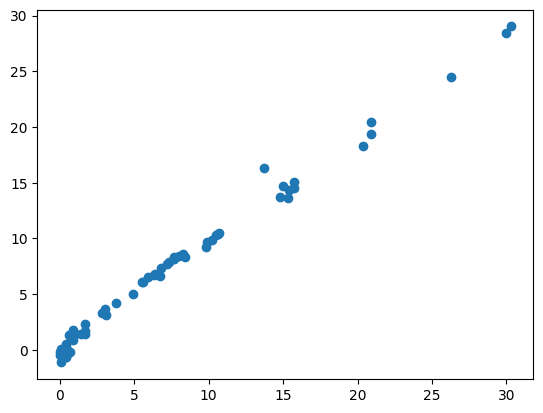

In [61]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(X_train_scaled, y_train)
y_r_pred = ridge.predict(X_test_scaled)

plt.scatter(y_test,y_r_pred)

r2 = r2_score(y_test, y_r_pred)
mae = mean_absolute_error(y_test, y_r_pred)

print("r2 Score : ",r2)
print("MAE : ",mae)

r2 Score :  0.9498661041483303
MAE :  1.2229242864228553


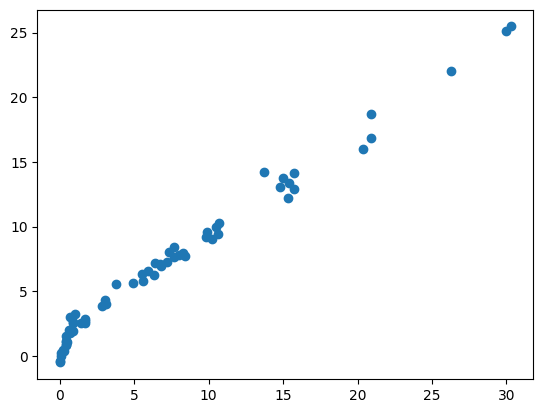

In [62]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train_scaled, y_train)
y_l_pred = lasso.predict(X_test_scaled)

plt.scatter(y_test,y_l_pred)

r2 = r2_score(y_test, y_l_pred)
mae = mean_absolute_error(y_test, y_l_pred)

print("r2 Score : ",r2)
print("MAE : ",mae)

r2 Score :  0.8748723702771193
MAE :  1.9198031211044861


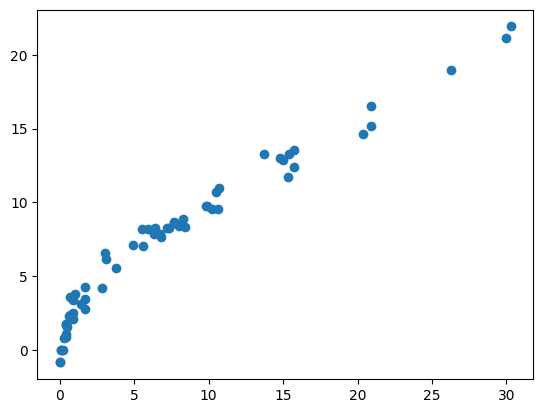

In [63]:
from sklearn.linear_model import ElasticNet

elas = ElasticNet()

elas.fit(X_train_scaled, y_train)
y_e_pred = elas.predict(X_test_scaled)

plt.scatter(y_test,y_e_pred)

r2 = r2_score(y_test, y_e_pred)
mae = mean_absolute_error(y_test, y_e_pred)

print("r2 Score : ",r2)
print("MAE : ",mae)

In [64]:
import pickle

scaler

StandardScaler()

In [65]:
linear_model

LinearRegression()

In [66]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(linear_model,open('linear_model.pkl','wb'))